# Graphical exploratory data analysis

For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. 

Anderson carefully measured the anatomical properties of samples of three different species of iris: Iris setosa, Iris versicolor, and Iris virginica. 

Here, you will work with his measurements of petal length.

In [1]:
import pandas as pd
iris = pd.read_csv('/work/data/Iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Introduction to exploratory data analysis (EDA)

The EDA is the process of organizing, summarizing and plotting your data, in order to begin to drawing conclusions about it.

The concept was created by John Tukey, who wrote a book entitled Exploratory Data Analysis in 1977.  About EDA, John Tukey said: "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

## Plotting a histogram

### Plotting a histogram of iris data

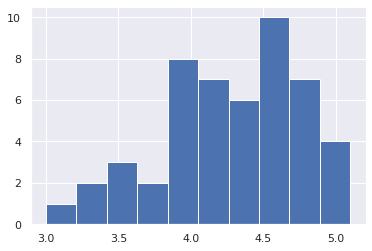

In [3]:
# Use seaborn to set the plotting defaults
# Plot a histogram of the Iris versicolor petal lengths
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.hist(iris[iris.Species == 'Iris-versicolor'].PetalLengthCm)
plt.show()

### Axis labels!

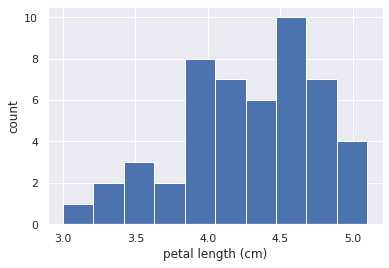

In [4]:
# Label the axes 
# Don't forget that you should always include units in your axis labels 
# Your y-axis label is just 'count' 
# Your x-axis label is 'petal length (cm)'

plt.hist(iris[iris.Species == 'Iris-versicolor'].PetalLengthCm)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

### Adjusting the number of bins in a histogram

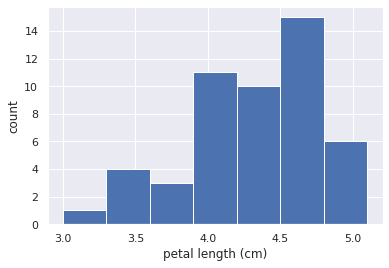

In [5]:
# Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins
# The "square root rule" is a commonly-used rule of thumb for choosing number of bins: 
# choose the number of bins to be the square root of the number of samples

import numpy as np 
n_data = len(iris[iris.Species == 'Iris-versicolor'].PetalLengthCm)
n_bins = int(np.sqrt(n_data))
plt.hist(iris[iris.Species == 'Iris-versicolor'].PetalLengthCm, bins=n_bins)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

## Plot all of your data: Bee swarm plots

### Bee swarm plot

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


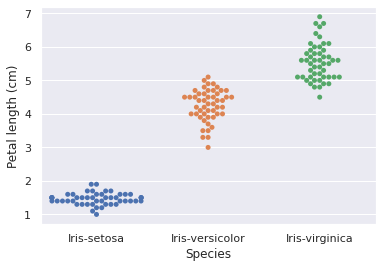

In [6]:
# Use sns.swarmplot() to make a bee swarm plot from the DataFrame containing the Fisher iris data set 
# The x-axis should contain each of the three species, and the y-axis should contain the petal lengths
# Label the axes

sns.swarmplot(x='Species', y='PetalLengthCm', data=iris)
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')
plt.show()

## Plot all of your data: ECDFs

### Computing the empirical cumulative distribution function ECDF

In [16]:
# Define a function with the signature ecdf(data)
# Compute the number of data points, n, using the len() function
# The x-values are the sorted data
# The y data of the ECDF go from 1/n to 1 in equally spaced increments
# The function returns the values x and y

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, (n+1)) / n
    return x, y

### Plotting the ECDF

In [18]:
# Use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers
# Unpack the output into x_vers and y_vers
x_vers, y_vers = ecdf(iris[iris.Species == 'Iris-versicolor'].PetalLengthCm)

Text(0, 0.5, 'ECDF')

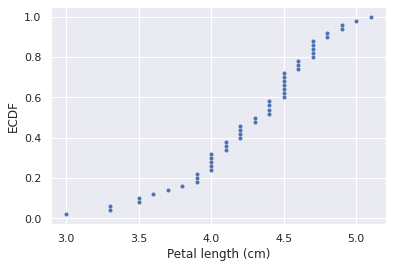

In [19]:
# Plot the ECDF as dots
# Label the axes
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.xlabel('Petal length (cm)')
plt.ylabel('ECDF')

### Comparison of ECDFs

[]

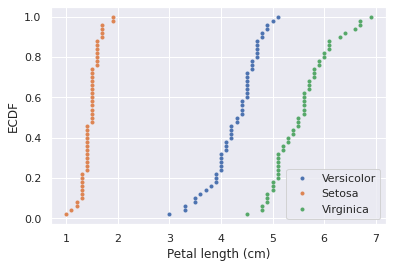

In [21]:
# Compute ECDFs for each of the three species using your ecdf() function

x_vers, y_vers = ecdf(iris[iris.Species == 'Iris-versicolor'].PetalLengthCm)
x_set, y_set = ecdf(iris[iris.Species == 'Iris-setosa'].PetalLengthCm)
x_vir, y_vir = ecdf(iris[iris.Species == 'Iris-virginica'].PetalLengthCm)

plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vir, y_vir, marker='.', linestyle='none')
plt.legend(('Versicolor', 'Setosa', 'Virginica'))
plt.xlabel('Petal length (cm)')
plt.ylabel('ECDF')
plt.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=372b2736-5c01-43ec-8ea4-0d42b8b93393' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>